2021

To solve for the values of Axx and kx and sub into matrix, ensure consistent units

In [140]:
import sympy as sp 
t=sp.symbols('t')
T1,T2=sp.Function('T_1')(t),sp.Function('T_2')(t)
M1=1000
M2=500
C=1000
Q=1000
UA=1000
M=100
m=10
Tin=60
T0=20
tank1=sp.Eq(T1.diff(t)*M1*C,M*C*(Tin-T1)+m*C*(T2-T1)-(m+M)*C*(T1-T2)-UA*(T1-T0))
tank2=sp.Eq(T2.diff(t)*M2*C,(m+M)*C*(T1-T2)-m*C*(T2-T1)-M*C*(T2-T0)+Q)
display(sp.solve(tank1,T1.diff(t))[0].evalf(),sp.solve(tank2,T2.diff(t))[0].evalf())

-0.221⋅T₁(t) + 0.12⋅T₂(t) + 6.02

0.24⋅T₁(t) - 0.44⋅T₂(t) + 4.002

To solve for steady state i.e. dX/dt = 0 where X is the variable given in exam

In [1]:
import sympy as sp

A11 = 0.015
A12 = -0.03
A21 = -0.015
A22 = 0.04
k1 = 10
k2 = 1.5



a,b=sp.symbols('a b')
x=-(A11*a+A12*b)+k1
y=-(A21*a+A22*b)+k2
sp.solve([x,y],[a,b])

{a: 2966.66666666667, b: 1150.00000000000}

Printing the eigenvector and eigenvalue (accounting for negative given in question)

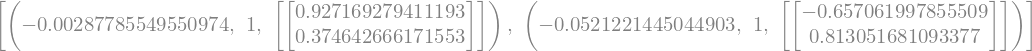

In [9]:
sp.init_printing()
A=sp.Matrix([[-A11,-A12],[-A21,-A22]])
A.eigenvects()


Hand-write diagonalized matrix

In [5]:
c1,c2, N1, N2, N=sp.symbols('C_1 C_2 N1 N2 N')

eigval_1 = -0.0029
eigval_2 = -0.0521

#eigenvect 1
comp_11 = 0.927
comp_12 = 0.374

#eigenvect 2
comp_21 = -0.657
comp_22 = 0.813

N1=c1*comp_11*sp.exp(eigval_1*N)+c2*comp_21*sp.exp(eigval_2*N)+2966.66
N2=c1*comp_12*sp.exp(eigval_1*N)+c2*comp_22*sp.exp(eigval_2*N)+1150

In [6]:
display(N1,N2)

0.927*C_1*exp(-0.0029*N) - 0.657*C_2*exp(-0.0521*N) + 2966.66

0.374*C_1*exp(-0.0029*N) + 0.813*C_2*exp(-0.0521*N) + 1150

We now have 2 expressions to solve for constants

In [144]:
sols = sp.solve([N1.subs(N,0)-80.19,N2.subs(N,0)-40.09],[c1,c2])
print(sols)

{C_1: -3077.85310530945, C_2: 50.6851923563769}


We can now get the expression for each tanks

In [145]:
Tank1=N1.subs(c1,-3077.85310530945).subs(c2,50.6851923563769)
Tank2=N2.subs(c1,-3077.85310530945).subs(c2,50.6851923563769)
display(Tank1,Tank2)

                            -0.0521⋅N                     -0.0029⋅N
2966.66 - 33.3001713781396⋅ℯ          - 2853.16982862186⋅ℯ         

                         -0.0521⋅N                     -0.0029⋅N
1150 + 41.2070613857344⋅ℯ          - 1151.11706138573⋅ℯ         

This can then be plotted

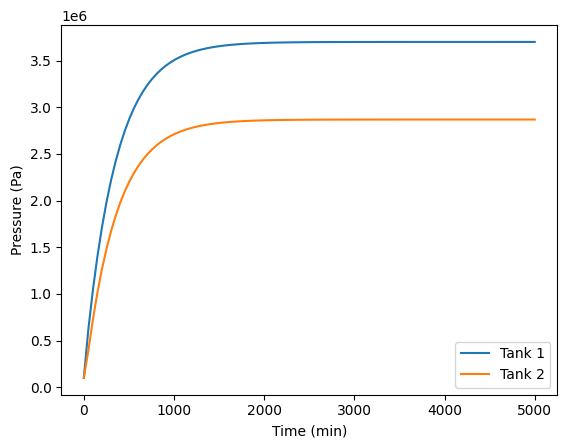

In [146]:
import numpy as np
import matplotlib.pylab as plt
time = np.linspace(0, 5000, 100)

V1 = 2
T1 = 300
V2 = 1
T2 = 300
R = 8.3145

x1_values = [Tank1.subs(N, ti) for ti in time]
x2_values = [Tank2.subs(N, ti) for ti in time]

p1_values = [x1 * R * T1 / V1 for x1 in x1_values]   #This step allows for conversion to another variable to plot
p2_values = [x2 * R * T2 / V2 for x2 in x2_values]

plt.plot(time, p1_values, label='Tank 1')
plt.plot(time, p2_values, label='Tank 2')
plt.xlabel('Time (min)')
plt.ylabel('Pressure (Pa)')
plt.legend()
plt.show()

Same process different example

In [147]:
import sympy as sp

A11 = 0.1
A12 = -0.01
A21 = -0.2
A22 = 0.2
q1 = 5
q2 = 0.1 

a,b=sp.symbols('a b')
x=-(A11*a+A12*b)+q1
y=-(A21*a+A22*b)+q2
sp.solve([x,y],[a,b])

{a: 55.6111111111111, b: 56.1111111111111}

In [148]:
A=sp.Matrix([[-A11,-A12],[-A21,-A22]])
sp.pprint(A.eigenvects())

⎡⎛                        ⎡⎡0.505207702981219⎤⎤⎞  ⎛                       ⎡⎡-0
⎢⎜-0.0829179606750063, 1, ⎢⎢                 ⎥⎥⎟, ⎜-0.217082039324994, 1, ⎢⎢  
⎣⎝                        ⎣⎣0.862997784961491⎦⎦⎠  ⎝                       ⎣⎣1.

.10417810068372⎤⎤⎞⎤
               ⎥⎥⎟⎥
21973844810545 ⎦⎦⎠⎦


In [149]:
c1,c2, T1, T2, T=sp.symbols('C_1 C_2 T1 T2 T')

eigval_1 = -0.083
eigval_2 = -0.217

#eigenvect 1
comp_11 = 0.505
comp_12 = 0.863

#eigenvect 2
comp_21 = -0.104
comp_22 = 1.220

T1=c1*comp_11*sp.exp(eigval_1*T)+c2*comp_21*sp.exp(eigval_2*T)+55.61
T2=c1*comp_12*sp.exp(eigval_1*T)+c2*comp_22*sp.exp(eigval_2*T)+56.11

In [150]:
sols = sp.solve([T1.subs(T,0)-20,T2.subs(T,0)-20],[c1,c2])
print(sols)

{C_1: -66.8690320350442, C_2: 17.7032579067567}


In [151]:
Tank1=T1.subs(c1,-66.8690320350442).subs(c2,17.7032579067567)
Tank2=T2.subs(c1,-66.8690320350442).subs(c2,17.7032579067567)
display(Tank1,Tank2)

                         -0.217⋅T                     -0.083⋅T
55.61 - 1.8411388223027⋅ℯ         - 33.7688611776973⋅ℯ        

                          -0.217⋅T                     -0.083⋅T
56.11 + 21.5979746462432⋅ℯ         - 57.7079746462431⋅ℯ        

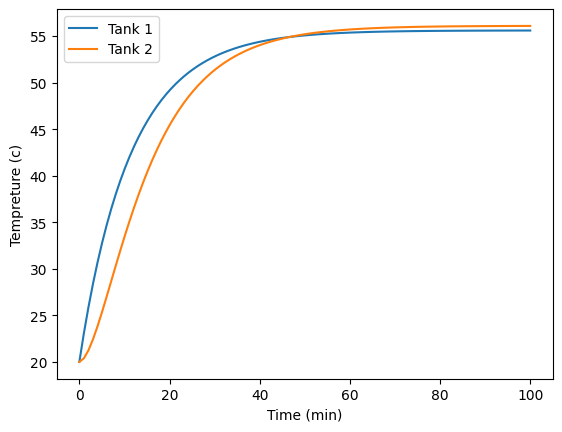

In [152]:
import numpy as np
import matplotlib.pylab as plt
time = np.linspace(0, 100, 100)

x1_values = [Tank1.subs(T, ti) for ti in time]
x2_values = [Tank2.subs(T, ti) for ti in time]

plt.plot(time, x1_values, label='Tank 1')
plt.plot(time, x2_values, label='Tank 2')
plt.xlabel('Time (min)')
plt.ylabel('Tempreture (c)')
plt.legend()
plt.show()

⎡⎛                        ⎡⎡0.505207702981219⎤⎤⎞  ⎛                       ⎡⎡-0
⎢⎜-0.0829179606750063, 1, ⎢⎢                 ⎥⎥⎟, ⎜-0.217082039324994, 1, ⎢⎢  
⎣⎝                        ⎣⎣0.862997784961491⎦⎦⎠  ⎝                       ⎣⎣1.

.10417810068372⎤⎤⎞⎤
               ⎥⎥⎟⎥
21973844810545 ⎦⎦⎠⎦
{C_1: -66.8690320350442, C_2: 17.7032579067567}


                         -0.217⋅T                     -0.083⋅T
55.61 - 1.8411388223027⋅ℯ         - 33.7688611776973⋅ℯ        

                          -0.217⋅T                     -0.083⋅T
56.11 + 21.5979746462432⋅ℯ         - 57.7079746462431⋅ℯ        

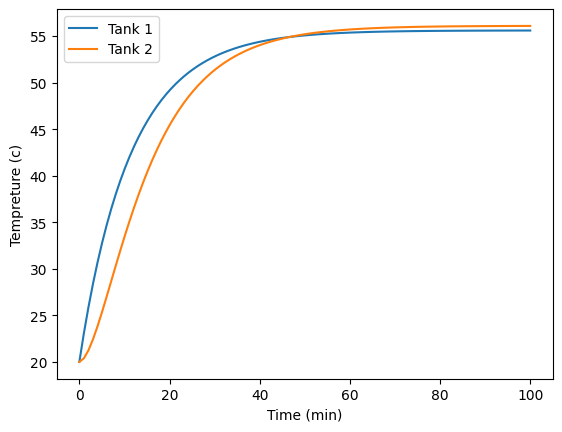

In [153]:
import sympy as sp

A11 = 0.1
A12 = -0.01
A21 = -0.2
A22 = 0.2
q1 = 5
q2 = 0.1 

a,b=sp.symbols('a b')
x=-(A11*a+A12*b)+q1
y=-(A21*a+A22*b)+q2
sp.solve([x,y],[a,b])

A=sp.Matrix([[-A11,-A12],[-A21,-A22]])
sp.pprint(A.eigenvects())

c1,c2, T1, T2, T=sp.symbols('C_1 C_2 T1 T2 T')

eigval_1 = -0.083
eigval_2 = -0.217

#eigenvect 1
comp_11 = 0.505
comp_12 = 0.863

#eigenvect 2
comp_21 = -0.104
comp_22 = 1.220

T1=c1*comp_11*sp.exp(eigval_1*T)+c2*comp_21*sp.exp(eigval_2*T)+55.61
T2=c1*comp_12*sp.exp(eigval_1*T)+c2*comp_22*sp.exp(eigval_2*T)+56.11

sols = sp.solve([T1.subs(T,0)-20,T2.subs(T,0)-20],[c1,c2])
print(sols)

Tank1=T1.subs(c1,-66.8690320350442).subs(c2,17.7032579067567)
Tank2=T2.subs(c1,-66.8690320350442).subs(c2,17.7032579067567)
display(Tank1,Tank2)

import numpy as np
import matplotlib.pylab as plt
time = np.linspace(0, 100, 100)

x1_values = [Tank1.subs(T, ti) for ti in time]
x2_values = [Tank2.subs(T, ti) for ti in time]

plt.plot(time, x1_values, label='Tank 1')
plt.plot(time, x2_values, label='Tank 2')
plt.xlabel('Time (min)')
plt.ylabel('Tempreture (c)')
plt.legend()
plt.show()


Method for verifying answer

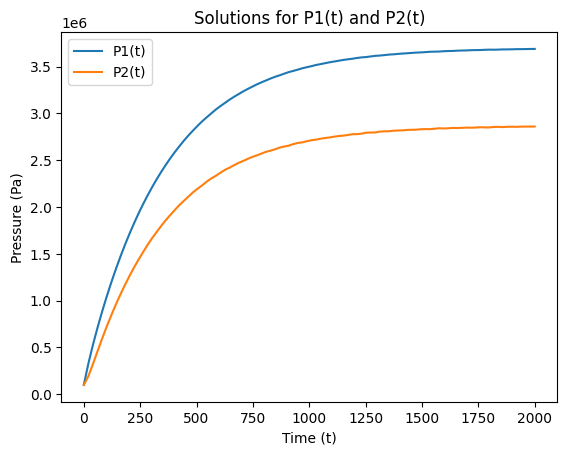

In [154]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

A11 = 0.015
A12 = -0.03
A21 = -0.015
A22 = 0.04
k1 = 10
k2 = 1.5

V1 = 2
T1 = 300
V2 = 1
T2 = 300
R = 8.3145

def funcs(t, N):

    N1, N2 = N
    dN1dt= -(A11*N1+A12*N2-k1)
    dN2dt= -(A21*N1+A22*N2-k2)

    return [dN1dt, dN2dt]


ics = [80.18,40.09]
time = 2000
t_eval = np.linspace(0, time, 100)
solution = solve_ivp(funcs, (0, time), ics, t_eval=t_eval)
plt.plot(solution.t, solution.y[0]*R*T1/V1, label="P1(t)")
plt.plot(solution.t, solution.y[1]*R*T2/V2, label="P2(t)")
plt.xlabel("Time (t)")
plt.ylabel("Pressure (Pa)")
plt.legend()
plt.title("Solutions for P1(t) and P2(t)")
plt.show()


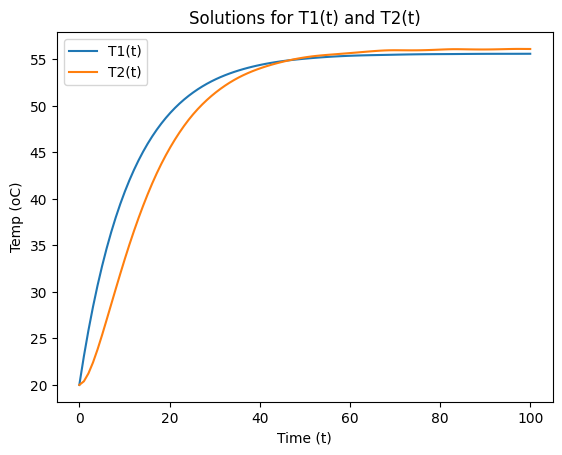

In [155]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

A11 = 0.1
A12 = -0.01
A21 = -0.2
A22 = 0.2
q1 = 5
q2 = 0.1 

def funcs(t, N):

    N1, N2 = N
    dT1dt= -(A11*N1+A12*N2-q1)
    dT2dt= -(A21*N1+A22*N2-q2)

    return [dT1dt, dT2dt]


ics = [20,20]
time = 100
t_eval = np.linspace(0, time, 100)
solution = solve_ivp(funcs, (0, time), ics, t_eval=t_eval)
plt.plot(solution.t, solution.y[0], label="T1(t)")
plt.plot(solution.t, solution.y[1], label="T2(t)")
plt.xlabel("Time (t)")
plt.ylabel("Temp (oC)")
plt.legend()
plt.title("Solutions for T1(t) and T2(t)")
plt.show()

If we have a third variable i.e. N3 from a 3rd tank

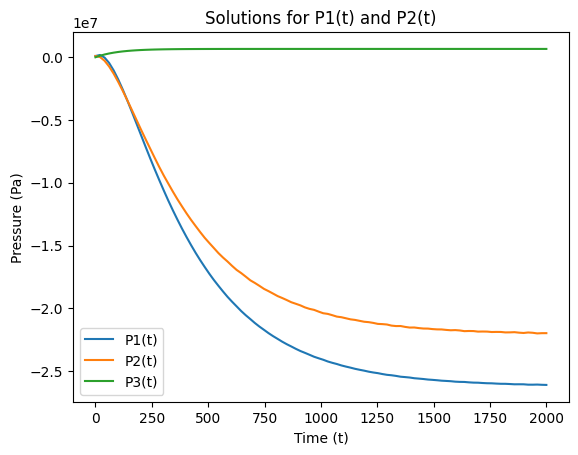

In [156]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

A11 = 0.015
A12 = -0.03
A13 = 0.6
A21 = -0.015
A22 = 0.04
A23 = 0.4
A31 = 0.0
A32 = 0.0
A33 = 0.01

V1 = 2
T1 = 300
V2 = 1
T2 = 300
R = 8.3145
V3 = 0.5
T3 = 400

def funcs(t, N):
    N1, N2, N3 = N
    dN1dt = -(A11*N1 + A12*N2 + A13*N3 - 10)
    dN2dt = -(A21*N1 + A22*N2 + A23*N3 - 1.5)
    dN3dt = -(A31*N1 + A32*N2 + A33*N3 - 1.0)
    return [dN1dt, dN2dt, dN3dt]

ics = [80.18, 40.09, 0.0]
time = 2000
t_eval = np.linspace(0, time, 100)
solution = solve_ivp(funcs, (0, time), ics, t_eval=t_eval)
plt.plot(solution.t, solution.y[0]*R*T1/V1, label="P1(t)")
plt.plot(solution.t, solution.y[1]*R*T2/V2, label="P2(t)")
plt.plot(solution.t, solution.y[2]*R*T3/V3, label="P3(t)")
plt.xlabel("Time (t)")
plt.ylabel("Pressure (Pa)")
plt.legend()
plt.title("Solutions for P1(t) and P2(t)")
plt.show()

If k1 or k2 depends on time 

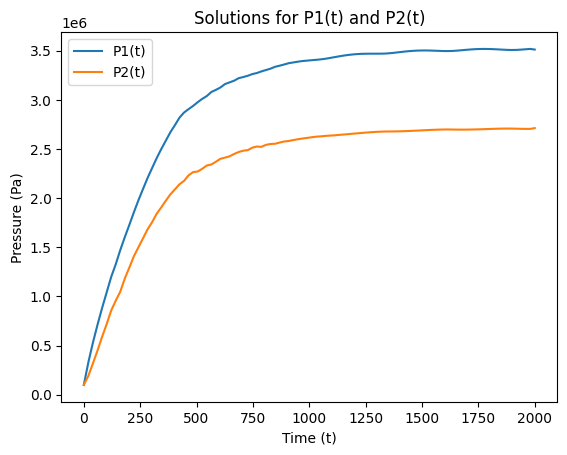

In [157]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

A11 = 0.015
A12 = -0.03
A21 = -0.015
A22 = 0.04
V1 = 2
T1 = 300
V2 = 1
T2 = 300
R = 8.3145

def k1(t):
    return 10 + np.sin(t)

def k2(t):
    return 1.5 + np.cos(t)

def funcs(t, N):

    N1, N2 = N
    dN1dt= -(A11*N1+A12*N2-k1(t))
    dN2dt= -(A21*N1+A22*N2-k2(t))

    return [dN1dt, dN2dt]


ics = [80.18, 40.09]
time = 2000
t_eval = np.linspace(0, time, 100)
solution = solve_ivp(funcs, (0, time), ics, t_eval=t_eval)
plt.plot(solution.t, solution.y[0]*R*T1/V1, label="P1(t)")
plt.plot(solution.t, solution.y[1]*R*T2/V2, label="P2(t)")
plt.xlabel("Time (t)")
plt.ylabel("Pressure (Pa)")
plt.legend()
plt.title("Solutions for P1(t) and P2(t)")
plt.show()

Mock Test: Further code

In [158]:
import sympy as smp
import numpy as np
import matplotlib.pyplot as plt

#Define Functions and constants

t = smp.symbols('t')
T1, T2 = smp.Function('T1')(t), smp.Function('T2')(t)
T_in = 20
m_dot = 1
m1 = 10
m2 = 5
c1 = 4.2 
c2 = 1.8
UA = 0.1
tau = 5
Q0 = 0.1

#Outline equations

heater = Q0*(1-smp.exp(-t/tau))
Tnk_1 = (m_dot*c1*(T_in-T1)+UA*(T2-T1))/m1*c1
Tnk_2 = (heater - UA*(T2-T1))/m2*c2

display(Tnk_1, Tnk_2)

-1.806⋅T₁(t) + 0.042⋅T₂(t) + 35.28

                                           -t 
                                           ───
                                            5 
0.036⋅T₁(t) - 0.036⋅T₂(t) + 0.036 - 0.036⋅ℯ   

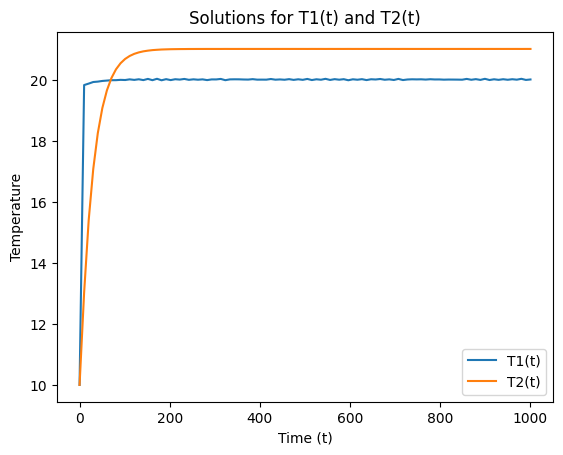

In [159]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

def funcs(t, T):
    T1, T2 = T
    dT1dt = - 1.806 * T1 + 0.042 * T2 + 35.28
    dT2dt = 0.036 * T1 - 0.036 * T2 + 0.036 - 0.036*np.exp(-t/tau)
    return [dT1dt, dT2dt]
ics = [10,10]
t_eval = np.linspace(0, 1000, 100)
solution = solve_ivp(funcs, (0, 1000), ics, t_eval=t_eval)
plt.plot(solution.t, solution.y[0], label="T1(t)")
plt.plot(solution.t, solution.y[1], label="T2(t)")
plt.xlabel("Time (t)")
plt.ylabel("Temperature")
plt.legend()
plt.title("Solutions for T1(t) and T2(t)")
plt.show()

In [160]:
import sympy as sp

A11 = -1.806
A12 = 0.042
A21 = 0.036
A22 = -0.036
q1 = 35.28

t = sp.symbols('t')
q2 = 0.036 - 0.036*sp.exp(-t/5)

a,b = sp.symbols('a b')
x = (A11*a + A12*b) + q1
y = (A21*a + A22*b) + q2

sol = sp.solve([x, y], [a, b])

a_ss = sp.limit(sol[a], t, sp.oo)
b_ss = sp.limit(sol[b], t, sp.oo)

print(f"The steady state values of a and b are approximately {a_ss:.2f} and {b_ss:.2f}, respectively.")


The steady state values of a and b are approximately 20.02 and 21.02, respectively.


In [161]:
A=sp.Matrix([[A11,A12],[A21,A22]])
sp.pprint(A.eigenvects())

⎡⎛                      ⎡⎡ 0.999793426317765 ⎤⎤⎞  ⎛                        ⎡⎡0
⎢⎜-1.80685382541365, 1, ⎢⎢                   ⎥⎥⎟, ⎜-0.0351461745863486, 1, ⎢⎢ 
⎣⎝                      ⎣⎣-0.0203249770426602⎦⎦⎠  ⎝                        ⎣⎣0

.0237108407065133⎤⎤⎞⎤
                 ⎥⎥⎟⎥
.999724594497685 ⎦⎦⎠⎦


In [162]:
c1,c2, T1, T2, T=sp.symbols('C_1 C_2 T1 T2 T')

eigval_1 = -1.806
eigval_2 = -0.035

#eigenvect 1
comp_11 = 0.9998
comp_12 = -0.0203

#eigenvect 2
comp_21 = 0.0237
comp_22 = 0.9997

T1=c1*comp_11*sp.exp(eigval_1*T)+c2*comp_21*sp.exp(eigval_2*T)+20.02
T2=c1*comp_12*sp.exp(eigval_1*T)+c2*comp_22*sp.exp(eigval_2*T)+21.02

sols = sp.solve([T1.subs(T,0)-10,T2.subs(T,0)-10],[c1,c2])
print(sols)

{C_1: -9.75600370554977, C_2: -11.2214132992124}


                          -1.806⋅T                      -0.035⋅T
20.02 - 9.75405250480859⋅ℯ         - 0.265947495191334⋅ℯ        

                           -1.806⋅T                     -0.035⋅T
21.02 + 0.198046875222659⋅ℯ         - 11.2180468752226⋅ℯ        

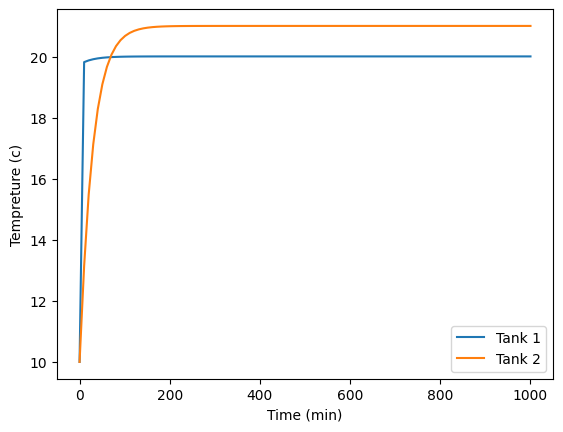

In [163]:
Tank1=T1.subs(c1,-9.7560037055497).subs(c2,-11.2214132992124)
Tank2=T2.subs(c1,-9.7560037055497).subs(c2,-11.2214132992124)
display(Tank1,Tank2)

import numpy as np
import matplotlib.pylab as plt
time = np.linspace(0, 1000, 100)

x1_values = [Tank1.subs(T, ti) for ti in time]
x2_values = [Tank2.subs(T, ti) for ti in time]

plt.plot(time, x1_values, label='Tank 1')
plt.plot(time, x2_values, label='Tank 2')
plt.xlabel('Time (min)')
plt.ylabel('Tempreture (c)')
plt.legend()
plt.show()



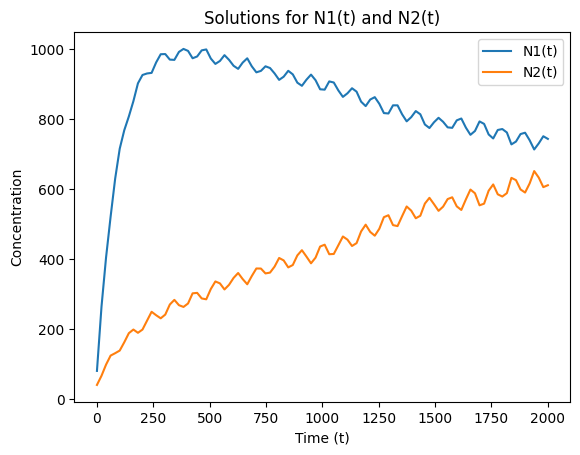

In [164]:
import numpy as np
from scipy.integrate import solve_ivp

# Define the function that represents the system of differential equations
def funcs(t, y, A11, A12, A21, A22, k1, k2):
    N1, N2 = y
    A = np.array([[A11(t), A12(t)], [A21(t), A22(t)]])
    dN1dt = -np.dot(A, [N1, N2])[0] + k1(t)
    dN2dt = -np.dot(A, [N1, N2])[1] + k2(t)
    return [dN1dt, dN2dt]

# Define the time-dependent constants
def A11(t):
    return 0.015 * np.sin(t)
def A12(t):
    return -0.03 * np.cos(t)
def A21(t):
    return -0.015 * np.sin(t)
def A22(t):
    return 0.04 * np.cos(t)
def k1(t):
    return 10 * np.exp(-0.01 * t)
def k2(t):
    return 1.5 * np.exp(-0.01 * t)

# Set initial conditions and time range
y0 = [80.18, 40.09]
t_span = [0, 2000]

# Solve the differential equation using the eigenanalysis
solution = solve_ivp(lambda t, y: funcs(t, y, A11, A12, A21, A22, k1, k2), t_span, y0, t_eval=np.linspace(t_span[0], t_span[1], 100))

# Plot the results
import matplotlib.pyplot as plt
plt.plot(solution.t, solution.y[0], label="N1(t)")
plt.plot(solution.t, solution.y[1], label="N2(t)")
plt.xlabel("Time (t)")
plt.ylabel("Concentration")
plt.legend()
plt.title("Solutions for N1(t) and N2(t)")
plt.show()


Cofirmation of eigenvalues

In [165]:
import numpy as np

# define the matrix and eigenvectors
A = np.array([[-0.1, 0.01], [0.2, -0.2]])
v1 = np.array([0.505207702981219, 0.862997784961491])
v2 = np.array([-0.10417810068372, 1.21973844810545])

# calculate the eigenvalues
eigenvalues = np.linalg.eigvals(A)
λ1 = eigenvalues[0]
λ2 = eigenvalues[1]

# check if Av = λv for eigenvector v1
if np.allclose(A.dot(v1), λ1*v1):
    print("The first eigenvector and eigenvalue are correct.")
else:
    print("The first eigenvector and eigenvalue are incorrect.")

# check if Av = λv for eigenvector v2
if np.allclose(A.dot(v2), λ2*v2):
    print("The second eigenvector and eigenvalue are correct.")
else:
    print("The second eigenvector and eigenvalue are incorrect.")

# print the eigenvalues
print("Eigenvalues: ", eigenvalues)


The first eigenvector and eigenvalue are correct.
The second eigenvector and eigenvalue are correct.
Eigenvalues:  [-0.08291796 -0.21708204]


In [166]:
import numpy as np

# define matrix A
A = np.array([[-0.1, 0.01], [0.2, -0.2]])

# calculate eigenvalues and eigenvectors
eigenvals, eigenvecs = np.linalg.eig(A)

# create diagonal matrix D from eigenvalues
D = np.diag(eigenvals)

# create eigenbasis matrix P from eigenvectors
P = eigenvecs

print("Eigenvalues:", eigenvals)
print("Eigenvectors:")
print(eigenvecs)
print("Diagonal matrix D:")
print(D)
print("Eigenbasis matrix P:")
print(P)

# verify that A*P = P*D
if np.allclose(np.dot(A, P), np.dot(P, D), atol=1e-4):
    print("The eigenbasis matrix is correct.")
else:
    print("There is an error with the eigenbasis matrix.")


Eigenvalues: [-0.08291796 -0.21708204]
Eigenvectors:
[[ 0.5052077  -0.08510036]
 [ 0.86299778  0.99637238]]
Diagonal matrix D:
[[-0.08291796  0.        ]
 [ 0.         -0.21708204]]
Eigenbasis matrix P:
[[ 0.5052077  -0.08510036]
 [ 0.86299778  0.99637238]]
The eigenbasis matrix is correct.


In [167]:
A11 = 0.015
A12 = -0.03
A21 = -0.015
A22 = 0.04

import numpy as np

# define matrix A
A = np.array([[-A11, -A12], [-A21, -A22]])

# calculate eigenvalues and eigenvectors
eigenvals, eigenvecs = np.linalg.eig(A)

# create diagonal matrix D from eigenvalues
D = np.diag(eigenvals)

# create eigenbasis matrix P from eigenvectors
P = eigenvecs

print("Eigenvalues:", eigenvals)
print("Eigenvectors:")
print(eigenvecs)
print("Diagonal matrix D:")
print(D)
print("Eigenbasis matrix P:")
print(P)

# verify that A*P = P*D
if np.allclose(np.dot(A, P), np.dot(P, D), atol=1e-4):
    print("The eigenbasis matrix is correct.")
else:
    print("There is an error with the eigenbasis matrix.")


Eigenvalues: [-0.00287786 -0.05212214]
Eigenvectors:
[[ 0.92716928 -0.62854921]
 [ 0.37464267  0.77776982]]
Diagonal matrix D:
[[-0.00287786  0.        ]
 [ 0.         -0.05212214]]
Eigenbasis matrix P:
[[ 0.92716928 -0.62854921]
 [ 0.37464267  0.77776982]]
The eigenbasis matrix is correct.


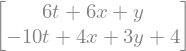

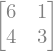

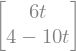

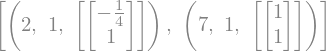

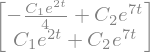

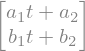

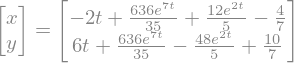

In [107]:
#Example question 

import sympy as sp
x,y,t = sp.symbols(' x y t ')
dxdt=6*x+y+6*t
dydt=4*x+3*y-10*t+4
ode_M=sp.Matrix([dxdt,dydt])
display(ode_M)
A=ode_M.jacobian([x,y])
f=ode_M-A@sp.Matrix([x,y])
display(A,f)
sp.init_printing()
ev=A.eigenvects()
display(ev)
c1,c2,a1,a2,b1,b2 = sp.symbols('C_1 C_2 a_1 a_2 b_1 b_2')
Xc=c1*ev[0][2][0]*sp.exp(ev[0][0]*t)+c2*ev[1][2][0]*sp.exp(ev[1][0]*t)
display(Xc)
Xp=sp.Matrix([a1,b1])*t+sp.Matrix([a2,b2])
display(Xp)
csteq=sp.Eq(Xp.diff(t),A*(Xp)+f)
csteq
eq1=csteq.rhs[0]-csteq.lhs[0]
eq2=csteq.rhs[1]-csteq.lhs[1]
display(eq1.factor(t),eq2.factor(t))
t_terms=[eq1.diff(t),eq2.diff(t)]
display(t_terms)
A1,B1=sp.solve(t_terms,[a1,b1])[a1],sp.solve(t_terms,[a1,b1])[b1]
nont_terms=[eq1.subs(t,0).subs(a1,A1),eq2.subs(t,0).subs(b1,B1)]
display(nont_terms)
A2,B2=sp.solve(nont_terms,[a2,b2])[a2],sp.solve(nont_terms,[a2,b2])[b2]
XP=Xp.subs({a1:A1,a2:A2,b1:B1,b2:B2})
X=Xc+XP
#ICS required lets say at t=0 x=20 and y=10
icseq=X.subs(t,0)
system3=[icseq[0]-20,icseq[1]-10]
C1,C2=sp.solve(system3,[c1,c2])[c1],sp.solve(system3,[c1,c2])[c2]
Xg=X.subs({c1:C1,c2:C2})
display(sp.Eq(sp.Matrix([x,y]),Xg))


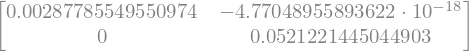

In [116]:
A11 = 0.015
A12 = -0.03
A21 = -0.015
A22 = 0.04
import sympy as sp
sp.init_printing()
A=sp.Matrix([[A11,A12],[A21,A22]])
ev=A.eigenvects()
P=sp.Matrix([[ev[0][2][0][0],ev[1][2][0][0]],[ev[0][2][0][1],ev[1][2][0][1]]])
P.inv()@A@P


https://www.youtube.com/watch?v=P65GBbpLzoQ&t=1323s

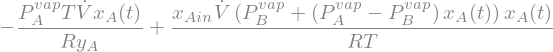

In [141]:
#Testquestion
import sympy as sp

xb,ya,yb,p,pavap,pbvap,na,nb,V ,R,T,xain= sp.symbols('x_B y_A y_B P \\ P^{vap}_A \\ P^{vap}_B N_A N_B \\dot{V} R T \\ x_{Ain}')
xa=sp.Function('x_A')(t)
L=V/(R*T)*(pbvap+xa*(pavap-pbvap))

dxadt=L*(xain)/1*xa-V*(xa*pavap/ya)/R*T
display(dxadt)

In [1]:
eq=dxadt.subs({R:8.314,pavap:0.10492,pbvap:0.53224,V:10/1000,T:60+273,xain:0.2,ya:1})
eq

NameError: name 'dxadt' is not defined

In [171]:
ics={xa.subs(t, 0):0.1}

In [172]:
xaeq=sp.dsolve(sp.Eq(xa.diff(t),eq),ics=ics)

<function matplotlib.pyplot.show(close=None, block=None)>

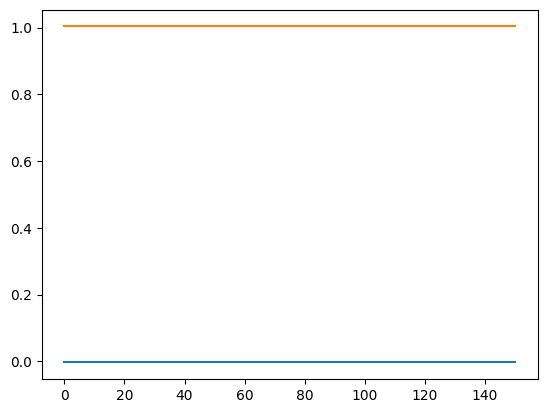

In [173]:
import matplotlib.pylab as plt
import numpy as np

time = np.linspace(0,150,1000)
xavals=[xaeq.rhs.subs(t,ti) for ti in time]
xbvals=[1-xaeq.rhs.subs(t,ti) for ti in time]
plt.plot(time,xavals)
plt.plot(time,xbvals)
plt.show

In [174]:
sp.solve(eq,xa)